<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;"></td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

<center>
<img src="https://media.discordapp.net/attachments/1126231743641428109/1138188172694650941/image.png?width=960&height=473">

    
## <center> QUANTUM SCHOLARS 2023


Autores: [Ricardo Quispe M.](https://github.com/RcrdPhysics).\, Tony Milla y Gustavo Valdivia
Institución: QuantumQuipu, Universidad Nacional Mayor de San Marcos\
Correo: ricardo.quispe5@unmsm.edu.pe, tony.milla@unmsm.edu.pe, gvaldiviamera@uh.edu
    
Este material está sujeto a los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso gratuito para cualquier propósito no comercial.

*También puede consultar la última versión de este notebook en nuestro [repositorio](https://github.com/QuantumQuipu/QuantumScholars2023) y los videos de clase [en nuestro canal de Youtube](https://www.youtube.com/@quantumquipu-unmsm1091/streams).*
    

Indicaciones:

1.- Este notebook deberá ser enviado a través del siguiente formulario: https://forms.gle/LRtmmhvZZ85Cuq5t9

2.- Fecha de entrega miércoles 16 de Agosto a las 18Hrs GMT-5

3.- Deberá adjuntar toda su solución en un solo notebook. (Ya sea cálculos a mano en formato imagen, o visualizaciones externas)

4.- Los problemas extra pueden reemplazar a cualquier problema dentro de la misma clase.



##Inicialización de paquetes

In [1]:
#!pip install qiskit
!pip install qiskit-ibmq-provider

In [2]:
!pip install pylatexenc

## Clase 1-2:

1.- ¿Cuál es el vector de estado de un sistema compuesto por 3 qubits , estando los qubits individuales(e independientes) en los estados  $|+\rangle $ , $|+\rangle $,$| -\rangle $,? Luego hacer las mediciones parciales para el qubit central, repetir lo mismo con qiskit.

2.- ¿Cuántos qubits independientes tiene como mínimo el siguiente sistema?

<center>
<img src="https://raw.githubusercontent.com/tonymilla/QuantumScholars2023/main/imagenes/examen/q_spherequestion.png">

3.- ¿Cómo se escribiría en notación de Dirac una compuerta CU3 desarrollalo e implementalo en qiskit para $\theta = \pi$, $\phi = \frac{\pi}{2}$ y $\lambda = \frac{7\pi}{2}$

1.

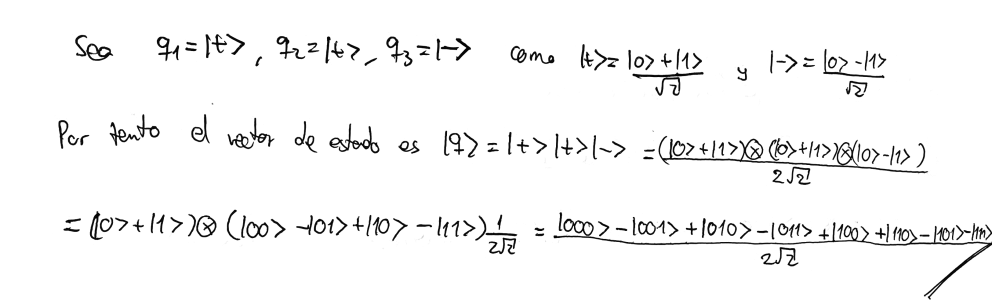

In [3]:
import math
import matplotlib.pyplot as plt

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
import numpy as np

In [4]:
from qiskit import *
from qiskit.visualization import plot_histogram

from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex, plot_bloch_multivector
from qiskit.extensions import UnitaryGate

from qiskit.providers.fake_provider import FakeYorktown

from qiskit import execute, Aer

from qiskit import transpile

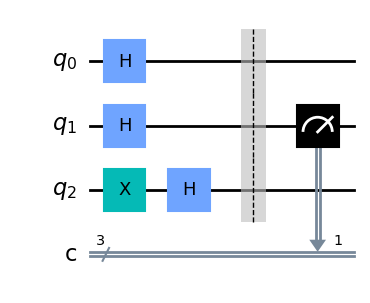

In [5]:
circ_ghz = QuantumCircuit(3, 3)     # circuito con 3 qubits y 3 bits clásicos
circ_ghz.h(0)
circ_ghz.h(1)
circ_ghz.x(2)
circ_ghz.h(2)
circ_ghz.barrier()
circ_ghz.measure(1, 1)  # medir los 3 qubits en los 3 bits clásicos
circ_ghz.draw('mpl')                # mostrar el circuito



---



2. Dos qubits independientes


---


3.

In [6]:
from qiskit.quantum_info.operators import Operator, Pauli
th=np.pi
lam=7*np.pi/2
phi=np.pi/2
CU3 = Operator([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, np.cos(th/2), -np.exp(1j*lam)*np.sin(th/2)], [0, 0,np.exp(1j*phi)*np.sin(th/2), np.exp(1j*(phi+lam))*np.cos(th/2)]])
CU3

Operator([[1.0000000e+00+0.00000000e+00j, 0.0000000e+00+0.00000000e+00j,
           0.0000000e+00+0.00000000e+00j, 0.0000000e+00+0.00000000e+00j],
          [0.0000000e+00+0.00000000e+00j, 1.0000000e+00+0.00000000e+00j,
           0.0000000e+00+0.00000000e+00j, 0.0000000e+00+0.00000000e+00j],
          [0.0000000e+00+0.00000000e+00j, 0.0000000e+00+0.00000000e+00j,
           6.1232340e-17+0.00000000e+00j, 4.2862638e-16+1.00000000e+00j],
          [0.0000000e+00+0.00000000e+00j, 0.0000000e+00+0.00000000e+00j,
           6.1232340e-17+1.00000000e+00j, 6.1232340e-17-2.99951957e-32j]],
         input_dims=(2, 2), output_dims=(2, 2))

## Clase 4-5

4.- A partir de la relación existente entre la operación (módulo 2) y el operador XOR ($\oplus$). Mostrar:

\begin{align}
\sum_{i=1}^n x_iz_i \pmod 2=x_1z_1\oplus x_2z_2\oplus\cdots\oplus x_nz_n
\end{align}

5.- Implementa el código para la función oráculo balanceado con $n=3$, la cual retorna el circuito cuántico qc. Considere que $f(x)$ está dado por:

\begin{align}
f(001)&=0\\
f(000)&=0\\
f(111)&=0\\
f(110)&=0\\
f(011)&=1\\
f(010)&=1\\
f(100)&=1\\
f(101)&=1\\
\end{align}

6.- En la construcción más simple posible de un oráculo balanceado, se utiliza la compuerta $CX$, la cual toma como objetivo el $(n+1)$-ésimo qubit del circuito y como control cada uno de los $n$ primeros qubits. Sin embargo, ¿es realmente necesario aplicar $CX$ a todos los $n$ primeros qubits, o podríamos prescindir de algunos y obtener igualmente un oráculo balanceado?

7.- Implemente el algoritmo de Grover para determinar la máxima cantidad de aristas en un grafo de 5 nodos y 6 aristas:

\begin{align}
(0,3)\\
(0,4)\\
(1,3)\\
(1,4)\\
(2,3)\\
(2,4)\\
\end{align}

8.- En el algoritmo de Grover, determine el número de veces que debe ejercutarse el par $U_\omega U_f$ para que el estado final de nuestro circuito coincida con el Ket de estados deseados sabiendo que $x\in\{0,1\}^5$ y hay 4 estados que sastifacen las características de búsqueda.

Extra 1.- Si

\begin{align}
\ket{\psi3}&=U\omega\ket{\psi_2}\
&=\left(2\ket{s}\bra{s}-\mathbb{I}\right)\left(-\sqrt{\frac{a}{2^n}}\ket{A}+\sqrt{\frac{b}{2^n}}\ket{B}\right)
\end{align}

Usando
\begin{align}
\ket{s}\bra{s}=\frac{a}{2^n}\ket{A}\bra{A}+\frac{b}{2^n}\ket{B}\bra{B}+\frac{\sqrt{ab}}{2^n}\left[\ket{A}\bra{B}+\ket{B}\bra{A}\right]
\end{align}
\begin{align}
&\sin\theta=\sqrt{\frac{a}{2^n}}\
&\cos\theta=\sqrt{\frac{b}{2^n}}
\end{align}

Demuestre:
\begin{align}
\ket{\psi_3}=\sin 3\theta\ket{A}+\cos 3\theta\ket{B}
\end{align}

4.

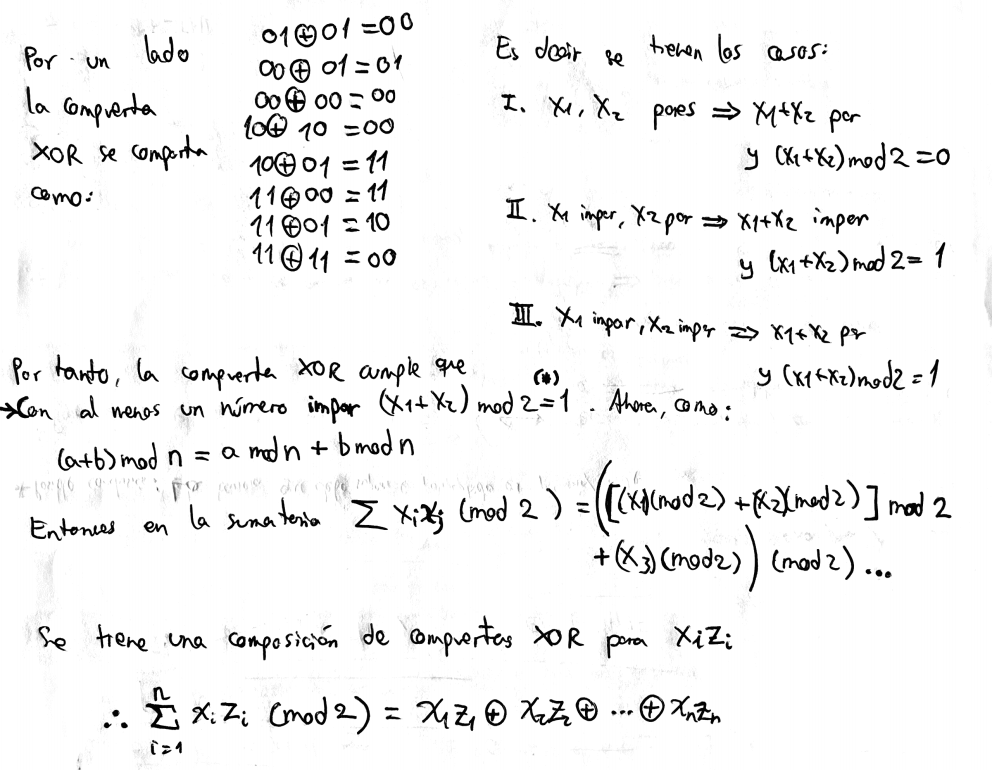

Extra 1.

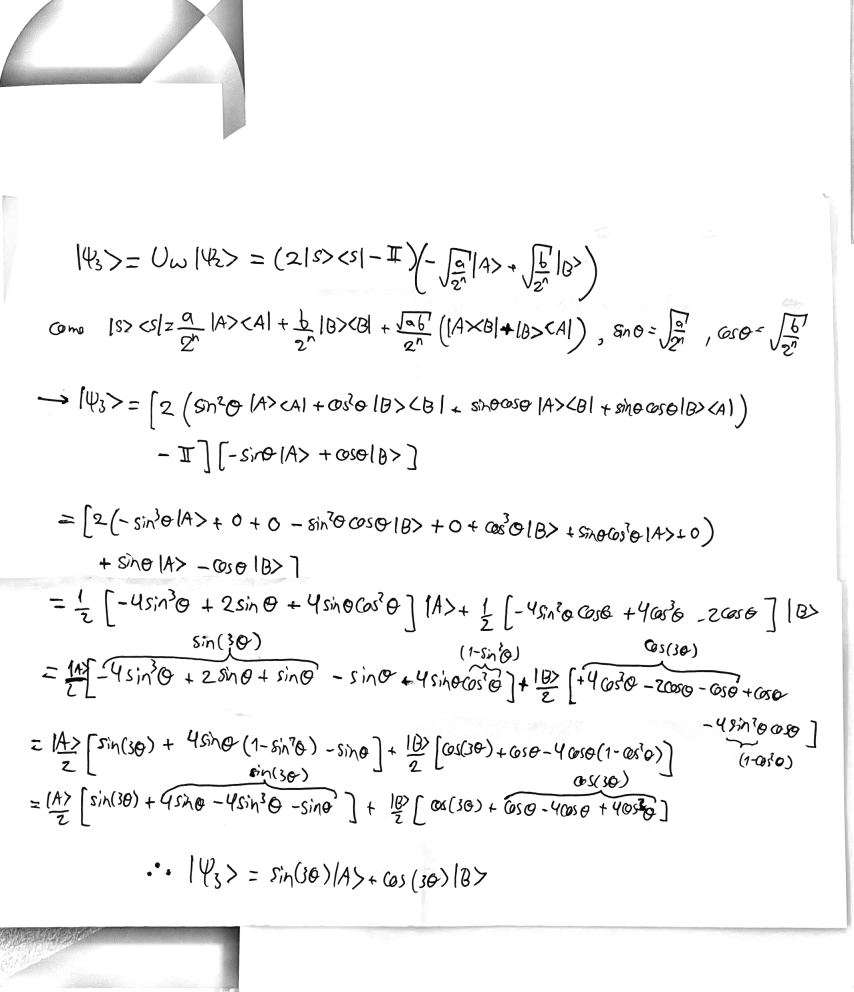

## Clase 6:

9.- La implementación de QFT se probó preparando el estado de Fourier $|\widetilde{5}\rangle$ para el cual $\text{QFT}^{\dagger}|\widetilde{5}\rangle= |101\rangle$. Intenta encontrar el estado $|a\rangle$ tal que $\text{QFT}^{\dagger}|a\rangle = |100\rangle$.

10.- Encuentra el estado $|b\rangle$ tal que $\text{QFT}^{\dagger}|b\rangle = |011\rangle$.

Extra 3. Intente escribir la función QFT sin recursividad. Utilice el simulador unitario de Qiskit para verificar sus resultados.

In [7]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [8]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

In [9]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

In [10]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

1.

In [44]:
nqubits = 3
number = 4
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/4,0)
qc.p(number*pi,1)
qc.p(number*pi/2,2)

qc.draw()

┌───┐ ┌──────┐
q_0: ┤ H ├─┤ P(π) ├
     ├───┤┌┴──────┤
q_1: ┤ H ├┤ P(4π) ├
     ├───┤├───────┤
q_2: ┤ H ├┤ P(2π) ├
     └───┘└───────┘

In [45]:
qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw()

┌─────────┐ ┌──────────┐   ┌───┐                                   »
   q_0: ┤ U2(0,π) ├─┤ U(0,0,π) ├─X─┤ H ├─■────────────────────────■────────»
        ├─────────┤┌┴──────────┤ │ └───┘ │P(-π/2) ┌───┐           │        »
   q_1: ┤ U2(0,π) ├┤ U(0,0,4π) ├─┼───────■────────┤ H ├─■─────────┼────────»
        ├─────────┤├───────────┤ │                └───┘ │P(-π/2)  │P(-π/4) »
   q_2: ┤ U2(0,π) ├┤ U(0,0,2π) ├─X──────────────────────■─────────■────────»
        └─────────┘└───────────┘                                           »
meas: 3/═══════════════════════════════════════════════════════════════════»
                                                                           »
«              ░ ┌─┐      
«   q_0: ──────░─┤M├──────
«              ░ └╥┘┌─┐   
«   q_1: ──────░──╫─┤M├───
«        ┌───┐ ░  ║ └╥┘┌─┐
«   q_2: ┤ H ├─░──╫──╫─┤M├
«        └───┘ ░  ║  ║ └╥┘
«meas: 3/═════════╩══╩══╩═
«                 0  1  2

configrc.store_credentials:WARNING:2023-08-16 13:02:09,838: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-08-16 13:02:10,090: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_jakarta
Job Status: job has successfully run


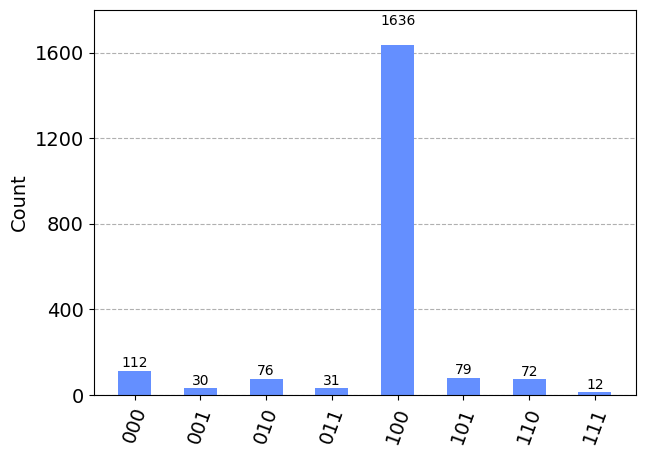

In [46]:
# Cargue sus cuentas IBMQ guardadas y obtenga el dispositivo backend menos ocupado con menos o igual a n qubits
from qiskit import IBMQ
IBMQ.save_account('d56a27adeb1d10cdad4a7e2690c186057b90dc186293c7be49f6843d267aa7882b589567ca05014a8bac39b29a0cd9810c40c2a73014f1777596794afbd5ea68')
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqubits
                                       and not x.configuration().simulator
                                       and x.status().operational==True))
print("least busy backend: ", backend)

shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
job_monitor(job)

counts = job.result().get_counts()
plot_histogram(counts)

2.

In [30]:
nqubits = 3
number = 5
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/2,0)
qc.p(number*pi/4,1)
qc.p(number*pi,2)

qc.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤ P(5π/2) ├
     ├───┤├─────────┤
q_1: ┤ H ├┤ P(5π/4) ├
     ├───┤└┬───────┬┘
q_2: ┤ H ├─┤ P(5π) ├─
     └───┘ └───────┘

In [31]:
qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw()

┌─────────┐┌─────────────┐   ┌───┐                                   »
   q_0: ┤ U2(0,π) ├┤ U(0,0,5π/2) ├─X─┤ H ├─■────────────────────────■────────»
        ├─────────┤├─────────────┤ │ └───┘ │P(-π/2) ┌───┐           │        »
   q_1: ┤ U2(0,π) ├┤ U(0,0,5π/4) ├─┼───────■────────┤ H ├─■─────────┼────────»
        ├─────────┤└┬───────────┬┘ │                └───┘ │P(-π/2)  │P(-π/4) »
   q_2: ┤ U2(0,π) ├─┤ U(0,0,5π) ├──X──────────────────────■─────────■────────»
        └─────────┘ └───────────┘                                            »
meas: 3/═════════════════════════════════════════════════════════════════════»
                                                                             »
«              ░ ┌─┐      
«   q_0: ──────░─┤M├──────
«              ░ └╥┘┌─┐   
«   q_1: ──────░──╫─┤M├───
«        ┌───┐ ░  ║ └╥┘┌─┐
«   q_2: ┤ H ├─░──╫──╫─┤M├
«        └───┘ ░  ║  ║ └╥┘
«meas: 3/═════════╩══╩══╩═
«                 0  1  2

In [32]:
# Cargue sus cuentas IBMQ guardadas y obtenga el dispositivo backend menos ocupado con menos o igual a n qubits
from qiskit import IBMQ
IBMQ.save_account('d56a27adeb1d10cdad4a7e2690c186057b90dc186293c7be49f6843d267aa7882b589567ca05014a8bac39b29a0cd9810c40c2a73014f1777596794afbd5ea68')
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqubits
                                       and not x.configuration().simulator
                                       and x.status().operational==True))
print("least busy backend: ", backend)

configrc.store_credentials:WARNING:2023-08-16 12:57:20,486: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-08-16 12:57:20,641: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_jakarta


In [33]:
shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
job_monitor(job)

Job Status: job has successfully run


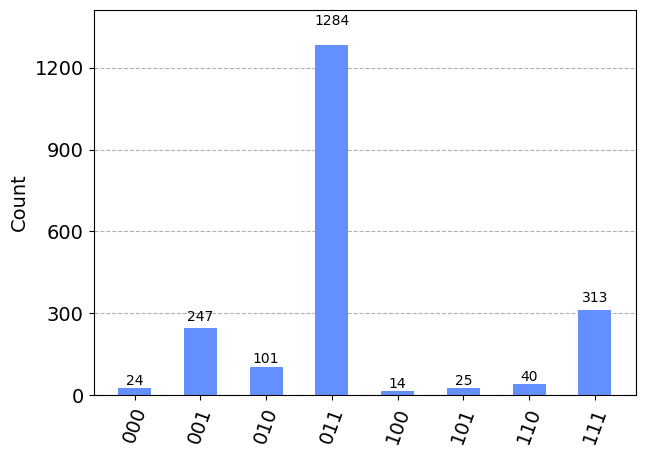

In [34]:
counts = job.result().get_counts()
plot_histogram(counts)

## 5. Recursos útiles

* Los notebooks y sus referencias.

## Donaciones
<br>
<center>
Puedes donar una vez en el siguiente enlace (Ko-Fi):

<br>
    
*Click en la imagen.*

<a href="https://ko-fi.com/rcrdphysics">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />

</center>